# Decision trees: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

## Carga de datos

Carga el dataset de `breast_cancer.csv`

In [1]:
import pandas as pd

In [28]:
df = pd.read_csv("../datasets/breast_cancer_bis.csv")

## Exploración de datos

Haz análisis univariantes, bivariantes y multivariantes  
Acompaña tus análisis con gráficas

In [3]:
import seaborn as sns

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<Axes: xlabel='mean_radius', ylabel='Count'>

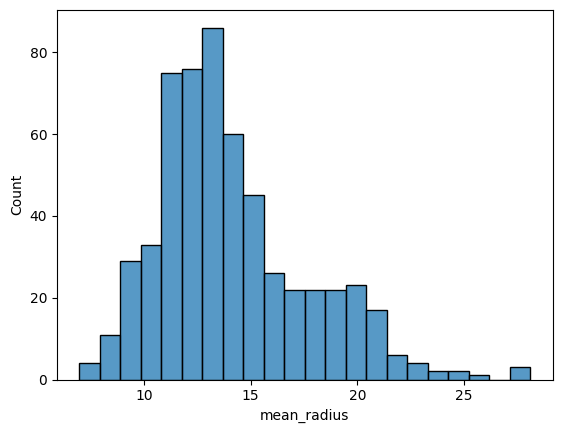

In [5]:
sns.histplot(x=df.mean_radius)

<Axes: xlabel='mean_radius', ylabel='Density'>

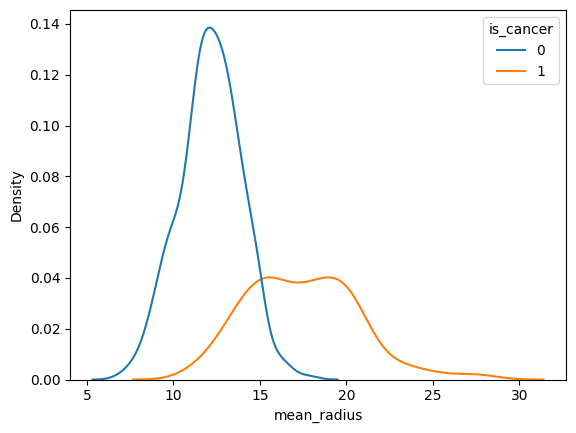

In [9]:
sns.kdeplot(x=df.mean_radius, hue=df.is_cancer)

<Axes: xlabel='is_cancer', ylabel='count'>

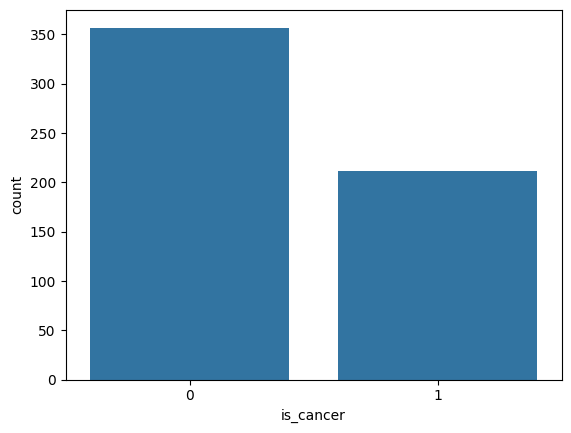

In [7]:
sns.countplot(x=df.is_cancer)

<Axes: xlabel='mean_radius', ylabel='mean_concavity'>

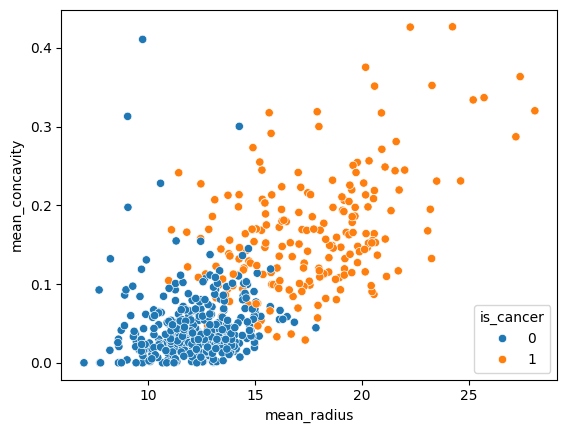

In [11]:
sns.scatterplot(x=df.mean_radius, y=df.mean_concavity, hue=df.is_cancer)

## Train/test split

Separa el dataset en train/test. Usarás este split a lo largo de toda la práctica

In [12]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns="is_cancer")
y = df.is_cancer

In [30]:
X.shape, y.shape

((569, 7), (569,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

## Métrica

Usaremos **accuracy** para evaluar la bondad de un modelo

Es suficiente con utilizar `predict` y no `predict_proba`

## Modelo de regresión logística

Entrena un modelo de regresión logística

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression(max_iter=10000)

In [34]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Cuál es su performance? Monta la matriz de confusión (real vs predicted) y calcula el accuracy

In [37]:
X_test.shape

(114, 7)

In [40]:
y_test.values

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [36]:
log.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score

Me importan los resultados sobre el test, pero ojeo el train también por curiosidad

In [46]:
accuracy_score(y_train, log.predict(X_train)).round(3)

0.91

In [43]:
accuracy_score(y_test, log.predict(X_test)).round(3)

0.912

Raro que sea mejor en el test que en el train

In [48]:
pd.crosstab(y_train, log.predict(X_train))

col_0,0,1
is_cancer,,
0,272,13
1,28,142


In [45]:
pd.crosstab(y_test, log.predict(X_test))

col_0,0,1
is_cancer,,
0,66,6
1,4,38


## Modelos de Decision Tree

### Entrena un `DecisionTreeClassifier`

Con `max_depth`=3

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree = DecisionTreeClassifier(max_depth=3)

In [72]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Cuál es su performance? Monta la matriz de confusión (real vs predicted) y calcula el accuracy

In [73]:
y_test.values

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [74]:
tree.predict(X_test)

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [75]:
accuracy_score(y_test, tree.predict(X_test)).round(3)

0.921

In [76]:
pd.crosstab(y_test, tree.predict(X_test))

col_0,0,1
is_cancer,,
0,66,6
1,3,39


Recordemos como lo hacía la Logistic Regression

In [78]:
pd.crosstab(y_test, log.predict(X_test))

col_0,0,1
is_cancer,,
0,66,6
1,4,38


Cuáles son las variables importantes?

In [67]:
pd.Series(tree.feature_importances_, index=X_train.columns)

mean_radius         0.082318
mean_texture        0.045095
mean_perimeter      0.093815
mean_area           0.000000
mean_smoothness     0.064774
mean_compactness    0.000000
mean_concavity      0.713997
dtype: float64

<Axes: ylabel='None'>

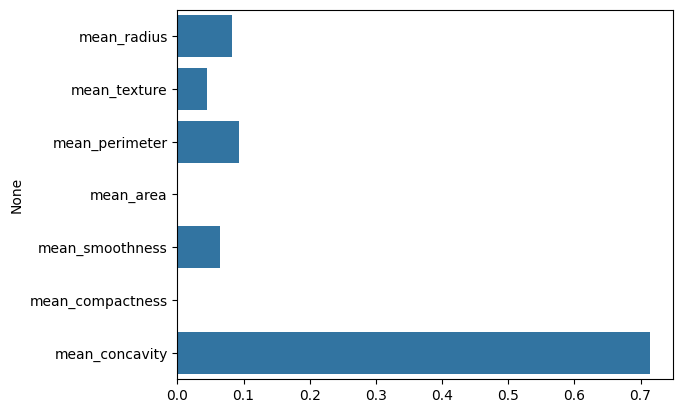

In [60]:
sns.barplot(x=tree.feature_importances_, y=X_train.columns)

Dibuja y exporta el árbol de decisión

In [61]:
from sklearn.tree import plot_tree

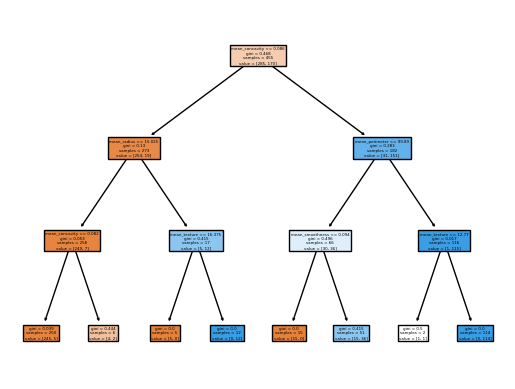

In [66]:
fig = plot_tree(tree, feature_names=X_train.columns, filled=True)

### Entrena varios `DecisionTreeClassifier`

Hazlo para varios valores de `max_depth`, y quédate con el mejor

In [69]:
for d in range(1, 20):
    treee = DecisionTreeClassifier(max_depth=d)
    treee.fit(X_train, y_train)

    preds = treee.predict(X_test)
    acc = accuracy_score(y_test, preds)

    print(f"d={d}, acc={acc.round(3)}")

d=1, acc=0.842
d=2, acc=0.851
d=3, acc=0.921
d=4, acc=0.912
d=5, acc=0.904
d=6, acc=0.895
d=7, acc=0.904
d=8, acc=0.895
d=9, acc=0.895
d=10, acc=0.904
d=11, acc=0.912
d=12, acc=0.921
d=13, acc=0.895
d=14, acc=0.904
d=15, acc=0.904
d=16, acc=0.895
d=17, acc=0.904
d=18, acc=0.912
d=19, acc=0.895


Cuál es su performance? Monta la matriz de confusión (real vs predicted) y calcula el accuracy

In [ ]:
tree

## Modelo "ensemble"

Crea un modelo que prediga la media entre las predicciones probabilísticas de:
 - una regresión logística
 - un árbol de decisión
 
y luego lo _discretice_ a 0, 1 con threshold 0.5

Cuál es su performance?

In [80]:
accuracy_score(y_test, log.predict(X_test)).round(3)

0.912

In [81]:
accuracy_score(y_test, tree.predict(X_test)).round(3)

0.921

In [88]:
log.predict_proba(X_test)[:10, 1].round(3)

array([0.081, 0.997, 0.651, 0.746, 0.02 , 0.474, 0.838, 1.   , 0.132,
       1.   ])

In [85]:
tree.predict_proba(X_test)[:10, 1]

array([0.02      , 1.        , 1.        , 0.        , 0.02      ,
       0.02      , 1.        , 1.        , 0.70588235, 1.        ])

In [92]:
df = pd.DataFrame({
    "real": y_test, 
    "log_preds": log.predict_proba(X_test)[:, 1].round(3),
    "tree_preds": tree.predict_proba(X_test)[:, 1],
})

In [97]:
df["mean_pred"] = (df.log_preds + df.tree_preds) / 2

In [100]:
df["mean_pred_01"] = (df.mean_pred > 0.5).astype(int)

In [101]:
df

,real,log_preds,tree_preds,mean_pred,mean_pred_01
421,0,0.081,0.02,0.0505,0
285,1,0.997,1.00,0.9985,1
283,1,0.651,1.00,0.8255,1
295,0,0.746,0.00,0.3730,0
168,0,0.020,0.02,0.0200,0
...,...,...,...,...,...
541,0,0.218,0.02,0.1190,0
461,0,0.030,0.02,0.0250,0
205,1,0.988,1.00,0.9940,1
448,0,0.200,0.02,0.1100,0


In [102]:
accuracy_score(y_test, df.mean_pred_01).round(3)

0.947

## ROC AUC

Investiga sobre la métrica ROC AUC, muy utilizada en problemas de clasificación